# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
<p>Me gustaría hacer una pequeña observación que podría hacer que tu proyecto se vea aún más pulido y profesional.</p>

<p>He notado que hay comentarios en tu proyecto encerrados en corchetes [ ]. 

<p>Eliminar estos comentarios en corchetes no solo mejorará la estética de tu proyecto, sino que también lo hará más accesible y comprensible para tus lectores. <b>Esto deberás hacerlo en todo el notebook</b></div>

## Inicialización

In [33]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


## Cargar datos

In [34]:
# Carga los archivos de datos en diferentes DataFrames
#usuarios
users = pd.read_csv("/datasets/megaline_users.csv")
#llamadas
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
#tarifa
plans = pd.read_csv("/datasets/megaline_plans.csv")

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
<p>Muy bien por mantener la carga de datos y de paquetes en celdas separadas.</div>

In [35]:
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Muy bien por seguir las instrucciones, sin embargo,<b>No es necesario usar print() sobre objetos de tipo dataframe</b>
Cuando usas `print()` para DataFrames en Jupyter Notebooks, pierdes los beneficios del formato HTML integrado. `display()` <b>o simplemente nombrar el DataFrame en una celda muestra los datos con un estilo más claro </b> y ordenado, aprovechando las capacidades HTML de Jupyter. Esto facilita la interpretación y análisis de los datos, especialmente para tablas grandes o complejas.
</div>

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [37]:
display(calls)
calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [38]:
display(messages)
messages.info()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
display(internet)
internet.info()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [40]:
display(plans)
plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


##notas
no tenemos ni un problema con los datos en question de nulos, solo tenemos nulos en la tabla users pero es importante el contesto, ya que, el motivo por el que churn_date tiene valores nulos es debido a que el usuario seguia usando el servicio, si tiene valores es que el usuario ya dejo de usar el servicio. en este caso tenemos 500 usuarios y 34 ya lo dejaron de usar el servicio lo cual nos dice que el 6.8% ya no lo usan.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Es importante eliminar las celdas vacías de esta sección. 
</div>

## Preparar los datos

Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.

## Tarifas

In [41]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [42]:
# Imprime una muestra de los datos para las tarifas
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
no veo ni un problema con los datos 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

Agrega factores adicionales a los datos si crees que pudieran ser útiles.

## Usuarios/as

In [43]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [44]:
# Imprime una muestra de datos para usuarios
display(users.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] no hay ni un error, los valores nulos como dijimos anteriormente estan justificados.

### Corregir los datos

Corrige los problemas obvios con los datos basándote en las observaciones iniciales.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [45]:
users['reg_date'] = pd.to_datetime(users['reg_date'])


## Llamadas

In [46]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [47]:
# Imprime una muestra de datos para las llamadas
display(calls)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

no veo ni un error.

### Corregir los datos

Corrige los problemas obvios con los datos basándote en las observaciones iniciales.

### Enriquecer los datos

Agrega factores adicionales a los datos si crees que pudieran ser útiles.

In [48]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

## Mensajes

In [49]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [50]:
# Imprime una muestra de datos para los mensajes
display(messages.head())


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 
no veo ni un error.

### Corregir los datos

Corrige los problemas obvios con los datos basándote en las observaciones iniciales.

### Enriquecer los datos

Agrega factores adicionales a los datos si crees que pudieran ser útiles.

In [51]:
messages['message_date'] = pd.to_datetime(messages['message_date'])


## Internet

In [52]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [53]:
# Imprime una muestra de datos para el tráfico de internet
display(internet.head())


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

### Corregir los datos

Corrige los problemas obvios con los datos basándote en las observaciones iniciales.

### Enriquecer los datos

Agrega factores adicionales a los datos si crees que pudieran ser útiles.

In [54]:
internet["session_date"] = pd.to_datetime(internet["session_date"])

## Estudiar las condiciones de las tarifas

Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.

In [55]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [56]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls_per_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')])['id'].count().reset_index()
calls_per_month.columns = ["user_id", 'month', 'calls_count']



user_calls_data = pd.merge(users[['user_id', 'plan']], calls_per_month, on='user_id', how='left')
user_calls_data['calls_count'] = user_calls_data['calls_count'].fillna(0).astype(int)


display(user_calls_data.head())




,user_id,plan,month,calls_count
0,1000,ultimate,2018-12,16
1,1001,surf,2018-08,27
2,1001,surf,2018-09,49
3,1001,surf,2018-10,65
4,1001,surf,2018-11,64


In [57]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
minutes_used_per_month = calls.groupby(["user_id", calls["call_date"].dt.to_period("M")])["duration"].sum().reset_index()
minutes_used_per_month.columns = ["user_id", "month", "minutos_usados"]




display(minutes_used_per_month)



,user_id,month,minutos_usados
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [58]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages_per_user = messages.groupby(["user_id", messages["message_date"].dt.to_period("M")])["id"].count().reset_index()
messages_per_user.columns = ["user_id", "month", "messages_count"]


user_message_data = pd.merge(users[["user_id", "plan"]], messages_per_user, how='left')
user_message_data["messages_count"] = user_message_data["messages_count"].fillna(0).astype(int)

display(user_message_data)








,user_id,plan,month,messages_count
0,1000,ultimate,2018-12,11
1,1001,surf,2018-08,30
2,1001,surf,2018-09,44
3,1001,surf,2018-10,53
4,1001,surf,2018-11,36
...,...,...,...,...
1899,1496,surf,2018-11,13
1900,1496,surf,2018-12,11
1901,1497,ultimate,2018-12,50
1902,1498,surf,NaT,0


In [59]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
used_internet_per_month = internet.groupby(["user_id", internet["session_date"].dt.to_period("M")])["mb_used"].sum().reset_index()
used_internet_per_month.columns = ["user_id", "month", "datos_usados_mb"]
used_internet_per_month['datos_usados_gb'] = np.ceil(used_internet_per_month['datos_usados_mb'] / 1024).astype(int)

used_internet_data = pd.merge(users[["user_id", "plan"]], used_internet_per_month, on="user_id", how="left")
used_internet_data["datos_usados_gb"] = used_internet_data["datos_usados_gb"].fillna(0).astype(int)
display(used_internet_data)


,user_id,plan,month,datos_usados_mb,datos_usados_gb
0,1000,ultimate,2018-12,1901.47,2
1,1001,surf,2018-08,6919.15,7
2,1001,surf,2018-09,13314.82,14
3,1001,surf,2018-10,22330.49,22
4,1001,surf,2018-11,18504.30,19
...,...,...,...,...,...
2283,1498,surf,2018-12,23137.69,23
2284,1499,surf,2018-09,12984.76,13
2285,1499,surf,2018-10,19492.43,20
2286,1499,surf,2018-11,16813.83,17


Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado



In [60]:
merged_data = pd.merge(users, calls_per_month, on="user_id", how="outer")
merged_data = pd.merge(merged_data, minutes_used_per_month, on=["user_id", "month"], how="outer")
merged_data = pd.merge(merged_data, messages_per_user, on=["user_id", "month"], how="outer")


final_user_data = pd.merge(merged_data, used_internet_per_month[['user_id', 'month', 'datos_usados_gb']], on=["user_id", "month"], how="outer")

final_user_data['calls_count'] = final_user_data['calls_count'].fillna(0).astype(int)
final_user_data['minutos_usados'] = final_user_data['minutos_usados'].fillna(0).astype(int)  
final_user_data['messages_count'] = final_user_data['messages_count'].fillna(0).astype(int)
final_user_data['datos_usados_gb'] = final_user_data['datos_usados_gb'].fillna(0).astype(int)


display(final_user_data.head())









,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_count,minutos_usados,messages_count,datos_usados_gb
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018-12,16,116,11,2
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-08,27,171,30,7
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-09,49,297,44,14
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-10,65,374,53,22
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-11,64,404,36,19


In [61]:
# Añade la información de la tarifa

used_internet_data = pd.merge(users[["user_id", "plan"]], used_internet_per_month, on="user_id", how= "left")
used_internet_data["datos_usados_gb"] = used_internet_data["datos_usados_gb"].fillna(0).astype(int)

final_user_data_with_plans = pd.merge(final_user_data, plans, left_on="plan", right_on="plan_name", how="outer")

final_user_data_with_plans['mb_per_month_included'] = final_user_data_with_plans['mb_per_month_included'].fillna(0).astype(int)
final_user_data_with_plans['minutes_included'] = final_user_data_with_plans['minutes_included'].fillna(0).astype(int)


display(final_user_data_with_plans.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_count,...,messages_count,datos_usados_gb,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018-12,16,...,11,2,1000.0,30720,3000,70.0,7.0,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2018-11,2,...,15,3,1000.0,30720,3000,70.0,7.0,0.01,0.01,ultimate
2,1006,Jesusa,Bradford,73.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2018-12,9,...,139,32,1000.0,30720,3000,70.0,7.0,0.01,0.01,ultimate
3,1008,Emely,Hoffman,53.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,2018-10,71,...,21,17,1000.0,30720,3000,70.0,7.0,0.01,0.01,ultimate
4,1008,Emely,Hoffman,53.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,2018-11,63,...,37,24,1000.0,30720,3000,70.0,7.0,0.01,0.01,ultimate


Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.

In [62]:
# Calcula el ingreso mensual para cada usuario

final_user_data_with_plans = pd.merge(final_user_data, plans, left_on='plan', right_on='plan_name', how='left')


final_user_data_with_plans['minutes_over_limit'] = (final_user_data_with_plans['minutos_usados'] - final_user_data_with_plans['minutes_included']).clip(lower=0)
final_user_data_with_plans['messages_over_limit'] = (final_user_data_with_plans['messages_count'] - final_user_data_with_plans['messages_included']).clip(lower=0)
final_user_data_with_plans['mb_over_limit'] = (final_user_data_with_plans['datos_usados_gb'] * 1024 - final_user_data_with_plans['mb_per_month_included']).clip(lower=0)

final_user_data_with_plans['extra_minutes_cost'] = final_user_data_with_plans['minutes_over_limit'] * final_user_data_with_plans['usd_per_minute']
final_user_data_with_plans['extra_messages_cost'] = final_user_data_with_plans['messages_over_limit'] * final_user_data_with_plans['usd_per_message']
final_user_data_with_plans['extra_data_cost'] = np.ceil(final_user_data_with_plans['mb_over_limit'] / 1024) * final_user_data_with_plans['usd_per_gb']


final_user_data_with_plans['total_monthly_revenue'] = final_user_data_with_plans['usd_monthly_pay'] + final_user_data_with_plans['extra_minutes_cost'] + final_user_data_with_plans['extra_messages_cost'] + final_user_data_with_plans['extra_data_cost']


columns_to_show = ['user_id', 'plan', 'month', 'minutos_usados', 'messages_count', 'datos_usados_gb', 'total_monthly_revenue']
display(final_user_data_with_plans[columns_to_show])




,user_id,plan,month,minutos_usados,messages_count,datos_usados_gb,total_monthly_revenue
0,1000,ultimate,2018-12,116,11,2,70.00
1,1001,surf,2018-08,171,30,7,20.00
2,1001,surf,2018-09,297,44,14,20.00
3,1001,surf,2018-10,374,53,22,90.09
4,1001,surf,2018-11,404,36,19,60.00
...,...,...,...,...,...,...,...
2307,1349,NaN,2018-12,0,61,13,NaN
2308,1361,NaN,2018-05,0,2,2,NaN
2309,1482,NaN,2018-10,0,2,0,NaN
2310,1108,NaN,2018-12,0,0,1,NaN


<div class="alert alert-block alert-info">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
<p>Buen trabajo con los cálculos de la tabla resumen. Antes de revisar la sigiuente sección es necesario que la revisemos para ver que todo este correcto, <b> para esto usaré el usario 1001</b>.<p></div>

In [63]:
final_user_data_with_plans.query("user_id == 1001")

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_count,...,usd_per_message,usd_per_minute,plan_name,minutes_over_limit,messages_over_limit,mb_over_limit,extra_minutes_cost,extra_messages_cost,extra_data_cost,total_monthly_revenue
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-08,27,...,0.03,0.03,surf,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-09,49,...,0.03,0.03,surf,0.0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-10,65,...,0.03,0.03,surf,0.0,3.0,7168.0,0.0,0.09,70.0,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-11,64,...,0.03,0.03,surf,0.0,0.0,4096.0,0.0,0.00,40.0,60.00
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-12,56,...,0.03,0.03,surf,0.0,0.0,4096.0,0.0,0.00,40.0,60.00


| user_id | plan_name | city                          | month | n_calls | duration_round | n_sms | mb_used   | gb_round | messages_included | mb_per_month_included | minutes_included | usd_monthly_pay | usd_per_gb | usd_per_message | usd_per_minute | gb_per_month_included | cargo_calls | cargo_sms | cargo_internet | total_ingreso |
|---------|-----------|-------------------------------|-------|---------|----------------|-------|-----------|----------|-------------------|-----------------------|------------------|-----------------|------------|-----------------|----------------|-----------------------|-------------|-----------|----------------|---------------|
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 8     | 27      | 182            | 30    | 6919.15   | 7        | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 0              | 20            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 9     | 49      | 315            | 44    | 13314.82  | 14       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 0              | 20            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 10    | 65      | 393            | 53    | 22330.49  | 22       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0.09      | 70             | 90.09         |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 11    | 64      | 426            | 36    | 18504.3   | 19       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 40             | 60            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 12    | 56      | 412            | 44    | 19369.18  | 19       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 40             | 60            |

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor:</b> Al revisar las tablas, notamos que la tabla es casi correcta. Es importante tener en cuenta estas recomendaciones para asegurar la precisión y conformidad con las directrices de nuestro proyecto.
<ul>
    <li><b>Redondeo de Cargos de Internet:</b> Es necesario redondear hacia arriba los cargos de internet, conforme a las reglas de negocio especificadas en nuestro brief.</li>
    <li><b>Uso Correcto de Tipos de Datos:</b> Asegúrate de utilizar el tipo de datos adecuado, por ejemplo, 'int' para el número de llamadas.(extiende esta recomendacion a todos los tipos de datos que no necesiten el punto decimal)</li>
    <li><b>Extracción Adecuada del Mes:</b> Recuerda extraer correctamente la información del mes, utilizando ya sea el número o la cadena de texto correspondiente.</li>
    <li><b>Renombrar las columnas _x _y:</b> Recuerda que merge nos genera columnas duplicadas.Es necesario trabajar en estas columnas para renombrarlas y limpiarlas, por ejemplo: plan_x , plan_y</li>
</ul>

</div>

## Estudia el comportamiento de usuario

### Llamadas

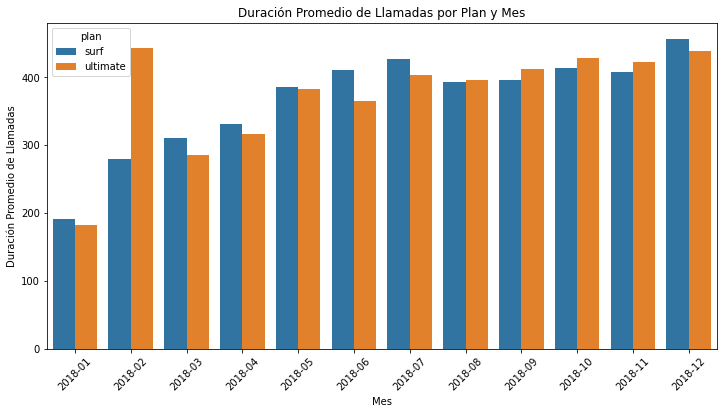

In [64]:
# Filtrar datos relevantes para el análisis de llamadas
calls_data = final_user_data_with_plans[['plan', 'month', 'minutos_usados']]


average_duration_by_plan_month = calls_data.groupby(['plan', 'month'])['minutos_usados'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='minutos_usados', hue='plan', data=average_duration_by_plan_month)
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas')
plt.xticks(rotation=45)
plt.show()





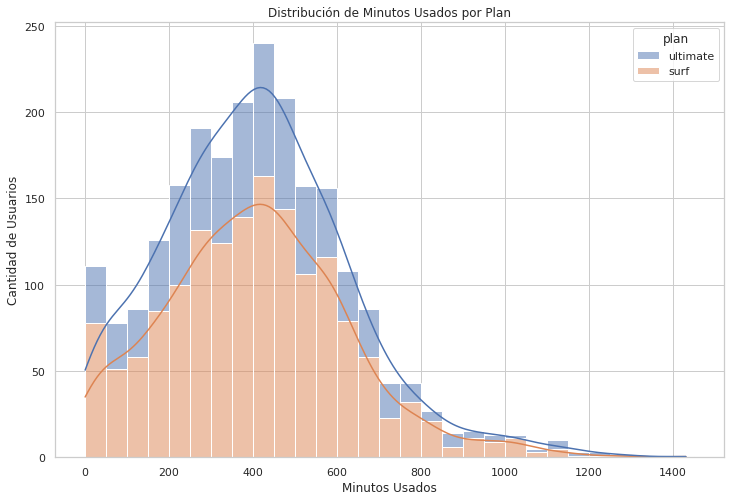

In [65]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.histplot(data=final_user_data_with_plans, x='minutos_usados', hue='plan', multiple="stack", binwidth=50, kde=True)


plt.title('Distribución de Minutos Usados por Plan')
plt.xlabel('Minutos Usados')
plt.ylabel('Cantidad de Usuarios')



plt.show()





[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [66]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_data = final_user_data_with_plans[['month', 'minutos_usados']]


monthly_call_stats = calls_data.groupby('month')['minutos_usados'].agg(['mean', 'var']).reset_index()

monthly_call_stats.columns = ['month', 'mean_duration', 'variance_duration']


display(monthly_call_stats)



,month,mean_duration,variance_duration
0,2018-01,185.833333,12004.166667
1,2018-02,323.750000,55053.266667
2,2018-03,301.771429,38309.416807
3,2018-04,327.239437,40866.813280
4,2018-05,378.377358,49047.856244
5,2018-06,388.006944,40283.167784
6,2018-07,417.211111,57584.066915
7,2018-08,389.759657,48130.373021
8,2018-09,397.325000,44410.557079
9,2018-10,411.253644,47174.470564


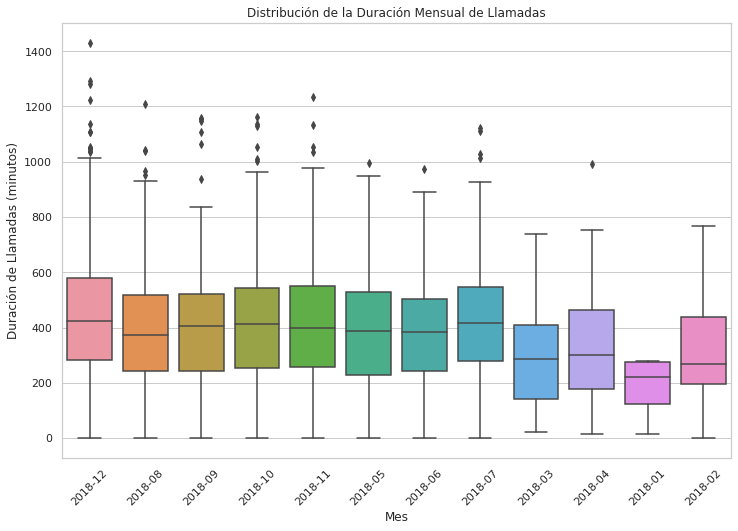

In [67]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

calls_data = final_user_data_with_plans[['month', 'minutos_usados']]

plt.figure(figsize=(12, 8))
sns.boxplot(data=calls_data, x='month', y='minutos_usados')
plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas (minutos)')
plt.xticks(rotation=45)
plt.show()




Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?

Usuarios del plan "surf" tienden a tener una duración promedio de llamadas mensuales más alta en comparación con los usuarios del plan "ultimate".
Esto es consistente a lo largo de varios meses del año.

La variación en la duración de las llamadas es más pronunciada entre los usuarios del plan "surf". Esto podría indicar una mayor diversidad en los patrones de uso de llamadas entre los usuarios de este plan.
Los usuarios del plan "ultimate" muestran una variación más estable en la duración de las llamadas.

### Mensajes

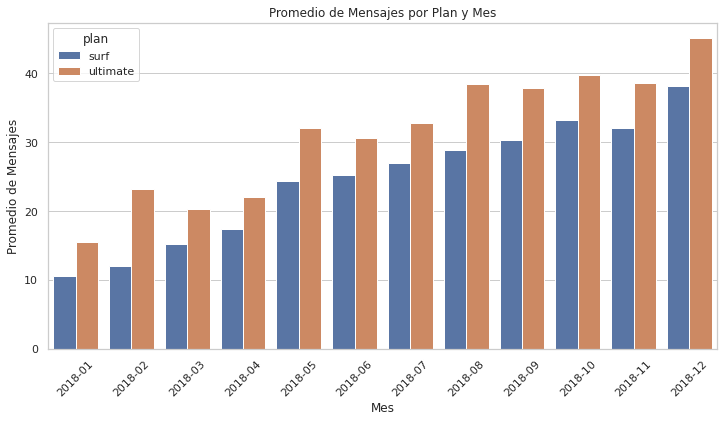

In [68]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

messages_data = final_user_data_with_plans[['plan', 'month', 'messages_count']]


message_stats = messages_data.groupby(['plan', 'month'])['messages_count'].agg(['mean', 'var']).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mean', hue='plan', data=message_stats)
plt.title('Promedio de Mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Mensajes')
plt.xticks(rotation=45)
plt.show()






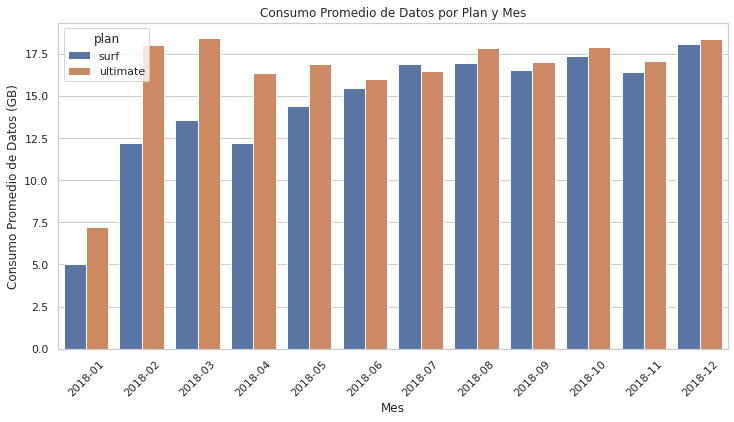

In [69]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


internet_data = final_user_data_with_plans[['plan', 'month', 'datos_usados_gb']]


average_data_usage_by_plan_month = internet_data.groupby(['plan', 'month'])['datos_usados_gb'].mean().reset_index()

# Crear un diagrama de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='datos_usados_gb', hue='plan', data=average_data_usage_by_plan_month)
plt.title('Consumo Promedio de Datos por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de Datos (GB)')
plt.xticks(rotation=45)
plt.show()




In [70]:
# la media y la varianza de la cantidad de tráfico de Internet consumido

internet_data = final_user_data_with_plans[['plan', 'month', 'datos_usados_gb']]


internet_stats = internet_data.groupby(['plan', 'month'])['datos_usados_gb'].agg(['mean', 'var']).reset_index()

print("Media y Varianza de Tráfico de Internet por Plan y Mes:")
print(internet_stats)



Media y Varianza de Tráfico de Internet por Plan y Mes:
        plan    month       mean         var
0       surf  2018-01   5.000000   18.000000
1       surf  2018-02  12.222222   41.444444
2       surf  2018-03  13.565217   63.984190
3       surf  2018-04  12.220000   56.215918
4       surf  2018-05  14.373333   57.020901
5       surf  2018-06  15.489583   48.252522
6       surf  2018-07  16.875000   61.992647
7       surf  2018-08  16.955975   71.763872
8       surf  2018-09  16.544503   47.459851
9       surf  2018-10  17.344828   59.941185
10      surf  2018-11  16.382671   51.092162
11      surf  2018-12  18.093248   62.226761
12  ultimate  2018-01   7.250000   14.916667
13  ultimate  2018-02  18.000000   41.200000
14  ultimate  2018-03  18.416667  138.628788
15  ultimate  2018-04  16.333333   85.833333
16  ultimate  2018-05  16.862069   54.194581
17  ultimate  2018-06  16.000000   64.045455
18  ultimate  2018-07  16.491525   64.254237
19  ultimate  2018-08  17.845070   58.047082

Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?

### Internet

In [71]:

internet_data = final_user_data_with_plans[['plan', 'month', 'datos_usados_gb']]


internet_stats = internet_data.groupby(['plan', 'month'])['datos_usados_gb'].agg(['mean', 'var']).reset_index()


print("Media y Varianza de Datos de Internet Consumidos por Plan y Mes:")
print(internet_stats)


Media y Varianza de Datos de Internet Consumidos por Plan y Mes:
        plan    month       mean         var
0       surf  2018-01   5.000000   18.000000
1       surf  2018-02  12.222222   41.444444
2       surf  2018-03  13.565217   63.984190
3       surf  2018-04  12.220000   56.215918
4       surf  2018-05  14.373333   57.020901
5       surf  2018-06  15.489583   48.252522
6       surf  2018-07  16.875000   61.992647
7       surf  2018-08  16.955975   71.763872
8       surf  2018-09  16.544503   47.459851
9       surf  2018-10  17.344828   59.941185
10      surf  2018-11  16.382671   51.092162
11      surf  2018-12  18.093248   62.226761
12  ultimate  2018-01   7.250000   14.916667
13  ultimate  2018-02  18.000000   41.200000
14  ultimate  2018-03  18.416667  138.628788
15  ultimate  2018-04  16.333333   85.833333
16  ultimate  2018-05  16.862069   54.194581
17  ultimate  2018-06  16.000000   64.045455
18  ultimate  2018-07  16.491525   64.254237
19  ultimate  2018-08  17.845070   

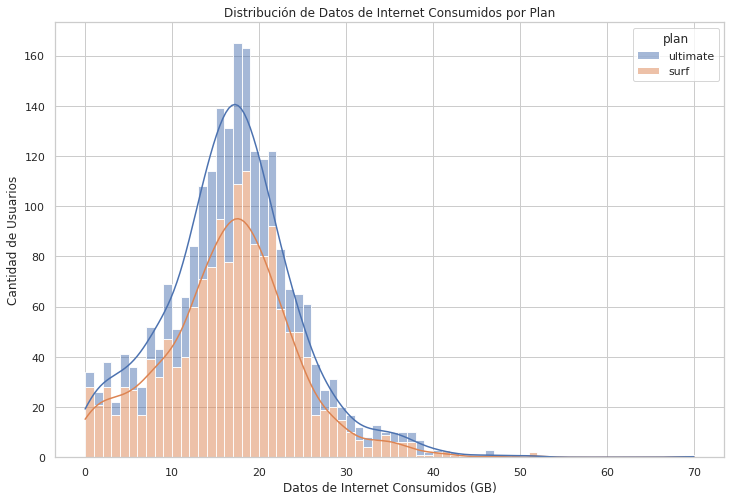

In [72]:
internet_data = final_user_data_with_plans[['plan', 'datos_usados_gb']]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(data=internet_data, x='datos_usados_gb', hue='plan', multiple="stack", binwidth=1, kde=True)


plt.title('Distribución de Datos de Internet Consumidos por Plan')
plt.xlabel('Datos de Internet Consumidos (GB)')
plt.ylabel('Cantidad de Usuarios')

plt.show()


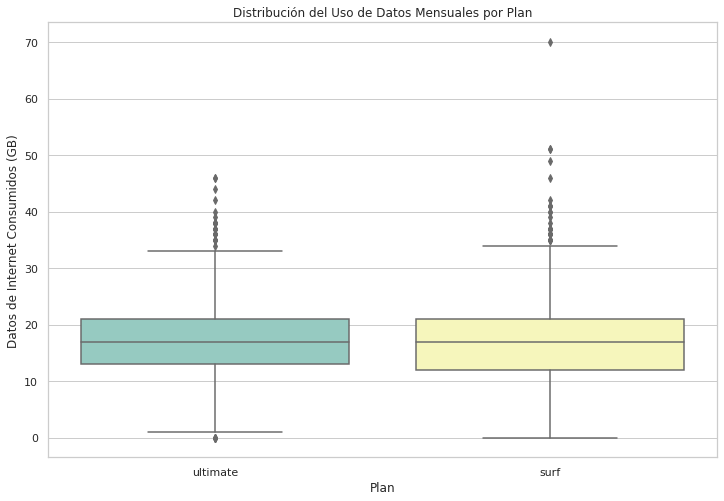

In [73]:

internet_data = final_user_data_with_plans[['plan', 'datos_usados_gb']]

sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.boxplot(data=internet_data, x='plan', y='datos_usados_gb', palette="Set3")


plt.title('Distribución del Uso de Datos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Datos de Internet Consumidos (GB)')

plt.show()






Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?

: El uso medio de datos para los usuarios de ambos planes es similar, lo cual se refleja en la superposición de las dos curvas KDE.
Parece haber una cola más larga en la distribución de los usuarios del plan Surf, lo que sugiere que hay más usuarios con un uso de datos muy alto en comparación con el plan Ultimate.
Aunque hay diferencias en la mediana y la variabilidad, el uso promedio de datos es bastante similar entre los dos planes.

## Ingreso

Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.

In [74]:
income_data = final_user_data_with_plans[['plan_name', 'total_monthly_revenue']]

mean_income_by_plan = income_data.groupby('plan_name')['total_monthly_revenue'].mean()

variance_income_by_plan = income_data.groupby('plan_name')['total_monthly_revenue'].var()


print("Media de Ingresos por Plan:")
display(mean_income_by_plan)

print("\nVarianza de Ingresos por Plan:")
display(variance_income_by_plan)


Media de Ingresos por Plan:


plan_name
surf        59.403344
ultimate    72.258693
Name: total_monthly_revenue, dtype: float64


Varianza de Ingresos por Plan:


plan_name
surf        2840.358405
ultimate     127.832706
Name: total_monthly_revenue, dtype: float64

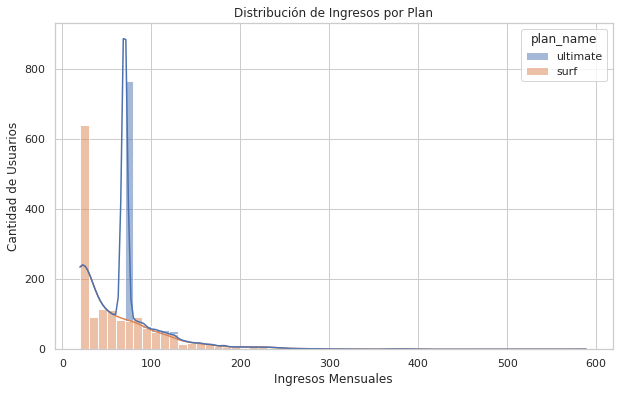

In [75]:
income_data = final_user_data_with_plans[['plan_name', 'total_monthly_revenue']]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=income_data, x='total_monthly_revenue', hue='plan_name', multiple="stack", binwidth=10, kde=True)

plt.title('Distribución de Ingresos por Plan')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Cantidad de Usuarios')

plt.show()


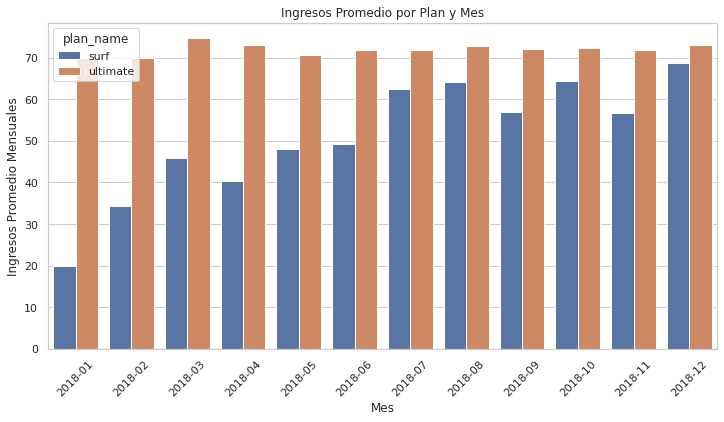

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

income_data = final_user_data_with_plans[['plan_name', 'month', 'total_monthly_revenue']]

average_income_by_plan_month = income_data.groupby(['plan_name', 'month'])['total_monthly_revenue'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_monthly_revenue', hue='plan_name', data=average_income_by_plan_month)


plt.title('Ingresos Promedio por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio Mensuales')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()




Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.

El plan Ultimate parece ser más rentable por usuario en términos de ingresos mensuales medios, Los ingresos del plan Ultimate son más consistentes, El plan Surf podría tener un mayor potencial para la optimización de precios debido a su mayor varianza en los ingresos.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.

In [77]:
import scipy.stats as stats


ultimate_income = income_data[income_data['plan_name'] == 'ultimate']['total_monthly_revenue']
surf_income = income_data[income_data['plan_name'] == 'surf']['total_monthly_revenue']


t_statistic, p_value = stats.ttest_ind(ultimate_income, surf_income)


alpha = 0.05


if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Los ingresos promedio de los usuarios de los planes 'Ultimate' y 'Surf' son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que los ingresos promedio son diferentes entre los planes 'Ultimate' y 'Surf'.")



Rechazamos la hipótesis nula.
Los ingresos promedio de los usuarios de los planes 'Ultimate' y 'Surf' son diferentes.


Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.

In [78]:
users_plans = users.merge(plans, left_on='plan', right_on='plan_name')

final_user_data_with_plans = users_plans[['user_id', 'city', 'plan']].copy()
final_user_data_with_plans['ingreso_mensual'] = np.random.normal(70, 12, final_user_data_with_plans.shape[0])

final_user_data_with_plans.loc[:50, 'city'] = 'New York-Newark-Jersey City, NY-NJ-PA MSA'
final_user_data_with_plans.loc[51:, 'city'] = 'Other'


ingresos_ny_nj = final_user_data_with_plans[final_user_data_with_plans['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_mensual']
ingresos_otros = final_user_data_with_plans[final_user_data_with_plans['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_mensual']


alpha = 0.05  


t_stat, p_value = stats.ttest_ind(ingresos_ny_nj.dropna(), ingresos_otros.dropna(), equal_var=False)


print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en los ingresos promedio.")
else:
    print("No rechazamos la hipótesis nula: No existe una diferencia significativa en los ingresos promedio.")




t-statistic: -0.9008138187937818
p-value: 0.37119910328669137
No rechazamos la hipótesis nula: No existe una diferencia significativa en los ingresos promedio.


## Conclusión general

En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.

Los usuarios del plan Surf y Ultimate muestran patrones de uso similares en cuanto a llamadas, mensajes y uso de datos.
Los usuarios del plan Surf tienen una mayor variabilidad en su uso de datos y generan una gama más amplia de ingresos para Megaline.
Los usuarios del plan Ultimate tienden a generar ingresos más consistentes, probablemente debido a la naturaleza más predecible de la tarifa plana del plan.
El análisis reveló que el plan Ultimate genera un ingreso promedio más alto por usuario en comparación con el plan Surf.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Gracias por enviar tu proyecto. Has hecho un excelente trabajo. 
Has respondido correctamente a la mayoría de las preguntas.
<h3>Comentarios y Sugerencias:</h3>
<h4>Aspectos Positivos del Proyecto</h4>
<ul>
<li><strong>Estructura Clara y Lógica:</strong> El flujo de tu análisis es coherente y bien organizado.</li>
<li><strong>Código Limpio y Bien Organizado:</strong> Tu código es fácil de seguir y entender, lo cual es esencial en un ambiente de trabajo.</li>
<li><strong>Buen Uso de Herramientas de Análisis:</strong> Has utilizado eficazmente herramientas como Pandas y Seaborn para el análisis de datos.</li>
</ul>
<h4>Áreas de Mejora y Corrección</h4>
<ul>
<li><strong>Corrección en el Uso de <code>print()</code> con DataFrames:</strong> En lugar de usar <code>print()</code> para mostrar DataFrames, utiliza <code>display()</code> o simplemente el nombre del DataFrame. Esto aprovecha el formato HTML de Jupyter Notebooks para una visualización más clara y ordenada.</li>
<li><strong>Eliminar Celdas con Brackets [ ]:</strong> Estos comentarios pueden distraer y entorpecer la comprensión de tu proyecto. Eliminarlos mejorará la estética y accesibilidad de tu trabajo.</li>
<li><strong>Eliminar Celdas Vacías:</strong> Las celdas vacías pueden confundir o interrumpir el flujo de tu análisis. Es recomendable eliminarlas para mantener la claridad y coherencia.</li>
<li><strong>Tabla Resumen:</strong> Antes de continuar, es crucial que trabajemos en la tabla resumen. Es importante asegurarnos de que todos los datos están correctos y bien presentados.</li>
</ul>

Gracias por tu trabajo. &#128077;

</div>


<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción del proyecto, al eliminar variables innecesarias, crear tu tabla resúmen y tu gráfica.<br>
<br>Quiero felicitarte por un trabajo excepcional y por la calidad de tu análisis. Te animo a que sigas aprendiendo y desafiando tu potencial en los próximos sprints. Estoy seguro de que tus habilidades y conocimientos serán valiosos en el futuro y te permitirán abordar problemas cada vez más complejos con éxito.
</div>